In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
import matplotlib.pyplot as plt

In [2]:
# Load and normalize the MNIST data
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

# Add channel dimension
train_X = train_X[..., tf.newaxis]
test_X = test_X[..., tf.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Data Augmentation
data_augment = tf.keras.Sequential([
    layers.RandomRotation(0.05),
    layers.RandomTranslation(0.05, 0.05)
])

In [4]:
# Build the model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    data_augment,

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, 5, strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, 5, strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.45),

    layers.Conv2D(128, 4, strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [7]:
lr_reduce = callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

In [8]:
# Train the model
history = model.fit(
    train_X,
    train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, lr_reduce],
    verbose=2
)

Epoch 1/100
844/844 - 23s - 28ms/step - accuracy: 0.9272 - loss: 0.2413 - val_accuracy: 0.9757 - val_loss: 0.0840 - learning_rate: 1.0000e-03
Epoch 2/100
844/844 - 14s - 16ms/step - accuracy: 0.9748 - loss: 0.0806 - val_accuracy: 0.9897 - val_loss: 0.0359 - learning_rate: 1.0000e-03
Epoch 3/100
844/844 - 15s - 18ms/step - accuracy: 0.9809 - loss: 0.0622 - val_accuracy: 0.9908 - val_loss: 0.0341 - learning_rate: 1.0000e-03
Epoch 4/100
844/844 - 14s - 17ms/step - accuracy: 0.9827 - loss: 0.0547 - val_accuracy: 0.9933 - val_loss: 0.0270 - learning_rate: 1.0000e-03
Epoch 5/100
844/844 - 20s - 24ms/step - accuracy: 0.9850 - loss: 0.0500 - val_accuracy: 0.9920 - val_loss: 0.0271 - learning_rate: 1.0000e-03
Epoch 6/100
844/844 - 14s - 17ms/step - accuracy: 0.9861 - loss: 0.0443 - val_accuracy: 0.9923 - val_loss: 0.0293 - learning_rate: 1.0000e-03
Epoch 7/100

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
844/844 - 20s - 23ms/step - accuracy: 0.9875 - loss: 0.0411

In [9]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_X, test_y, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")


Final Test Accuracy: 0.9963


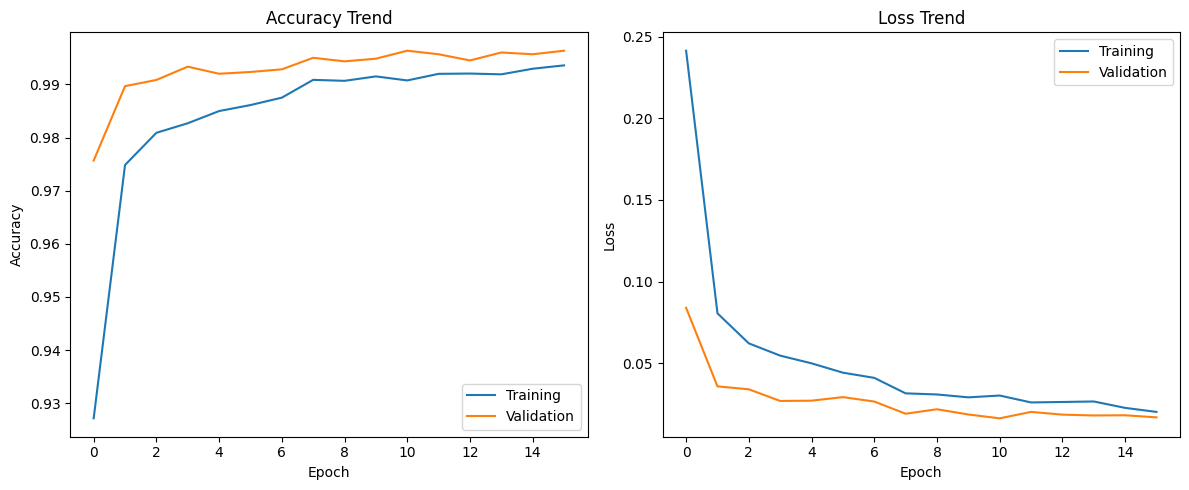

In [10]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

###  **Summary / Conclusion: Improving CNN Accuracy on MNIST**

1. **Data Augmentation**:

   * Introduced slight random rotations and translations.
   * Helps the model generalize better by simulating variations in handwriting.

2. **Increased Dropout in Deeper Layers**:

   * Dropout rates were slightly raised (up to 0.5) in later convolutional blocks.
   * This reduces overfitting by preventing the model from becoming too reliant on specific neurons.

3. **Batch Normalization After Every Convolution**:

   * Added after each convolutional layer to stabilize and accelerate training.
   * Helps the model converge faster and improve performance.

4. **Strided Convolutions for Downsampling**:

   * Used strided convolutions instead of pooling layers for feature map reduction.
   * Preserves more learning capability while reducing spatial dimensions.

5. **Global Average Pooling**:

   * Replaces Flatten to reduce the number of parameters.
   * Reduces overfitting and improves model interpretability.



